In [1]:
import requests
import numpy as np
import pandas as pd
import re
import pickle
import os
import random

import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats

from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNetCV
from sklearn.model_selection import train_test_split, KFold
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'The Futility of Random Scrapes')

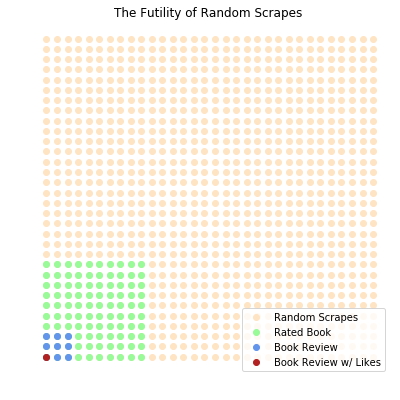

In [2]:
#random scrapes are not enough

x1024 = list(range(32))*32
y1024 = [[i]*32 for i in range(32)]

x100 = list(range(10))*10
y100 = [[i]*10 for i in range(10)]

x9 = list(range(3))*3
y9 = [[i]*3 for i in range(3)]

plt.figure(figsize=(6.5, 6.5))
ax1 = plt.scatter(x1024, y1024, color='bisque', label='Random Scrapes')
ax2 = plt.scatter(x100, y100, color='palegreen', label='Rated Book')
ax3 = plt.scatter(x9, y9, color='cornflowerblue', label='Book Review')
ax4 = plt.scatter(0,0, color='firebrick', label='Book Review w/ Likes')
plt.axis('off')
plt.legend(loc='lower right')
plt.title('The Futility of Random Scrapes')

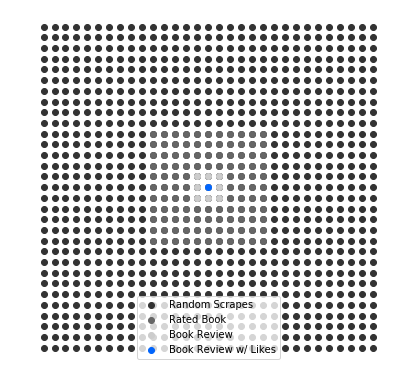

In [3]:
x1024 = list(range(31))*31
y1024 = [[i]*31 for i in range(31)]

x100 = list(range(10, 21))*11
y100 = [[i]*11 for i in range(10,21)]

x9 = list(range(14,17))*3
y9 = [[i]*3 for i in range(14,17)]

plt.figure(figsize=(6.5, 6.5))
ax1 = plt.scatter(x1024, y1024, color='#333333', label='Random Scrapes')
ax2 = plt.scatter(x100, y100, color='#666666', label='Rated Book')
ax3 = plt.scatter(x9, y9, color='#CCCCCC', label='Book Review')
ax4 = plt.scatter(15,15, color='#0165fc', label='Book Review w/ Likes')
plt.axis('off')
plt.legend(loc='lower center')

In [4]:
# check that we're in the right directory

print(os.getcwd())
#os.chdir('..')

/home/michael/OneDrive/ds/metis/bootcamp/sf18_ds12/projects/metis_02-Luther


In [5]:
# #load older scrapes

# os.chdir('older review scrapes')
# os.getcwd()

# jar = []

# for file in os.listdir():
#     if file.split('.')[-1]=='pkl':
#         jar.append(file)



# for file in jar:
#     d = pickle.load(open(file, "rb" ))
#     df = pd.concat([df,d], sort=True)

# jar = []

# for file in os.listdir():
#     if file.split(' ')[-1]=='book.pkl':
#         jar.append(file)
        
# for file in jar:
#     d = pickle.load(open(file, "rb" ))
#     df = pd.concat([df,d], sort=False, ignore_index=True)

In [7]:
# new scrapes have a slightly different format
jar = []
df = pd.DataFrame()
jar.append('Benson_Data_Sample.pkl')

for file in os.listdir():
    if file.split(' ')[-1]=='book.pkl':
        jar.append(file)
    
for file in jar:
    d = pickle.load(open(file, "rb" ))
    df = pd.concat([df,d], sort=False, ignore_index=True)

In [9]:
#for sharing on github, this is a 20000 paper sample from the full scrape
#as such values may change from what is presented

print('shape:', df.shape)

df.columns
df.review_score.replace('it was ok', 2, inplace=True)
df.review_score.value_counts()

shape: (20600, 23)


5    8383
4    6514
3    3053
2    1537
1    1104
0       9
Name: review_score, dtype: int64

In [10]:
df.head()

,author,average_rating,book_date,book_title,book_url,comments,images,isbn,likes,paragraphs,...,shelves,times_rated,times_reviewed,url,user_followers,user_friends,username,userurl,words,review_delta
0,Douglas Adams,3.98,June 1st 1991,Dirk Gently's Holistic Detective Agency (Dirk ...,https://www.goodreads.com/book/show/365.Dirk_G...,0,0,0671746723,3,3,...,"[ebooks-i-own, hyper-rpg-book-club]",104735,2876,https://www.goodreads.com/review/show/1130885805,0,133,Ellana Thornton-Wheybrew,https://www.goodreads.com/user/show/6466124-el...,36,1.02
1,Rick Riordan,4.24,March 1st 2006,The Lightning Thief (Percy Jackson and the Oly...,https://www.goodreads.com/book/show/28187.The_...,0,0,Chronicles,37,2,...,"[fantasy-scifi-punks, middle-grade-babies, rer...",1623987,50816,https://www.goodreads.com/review/show/2100719040,343,785,Romie,https://www.goodreads.com/user/show/33510193-r...,182,-0.24
2,China Miéville,3.97,August 2003,"Perdido Street Station (New Crobuzon, #1)",https://www.goodreads.com/book/show/68494.Perd...,2,0,Grimnebuli,7,3,...,"[fantasy, horror, own-print, was-tbr]",51007,4252,https://www.goodreads.com/review/show/1709256678,20,113,Marta,https://www.goodreads.com/user/show/2168708-marta,301,1.03
3,Connie Willis,4.13,December 1st 1998,To Say Nothing of the Dog: Or How We Found the...,https://www.goodreads.com/book/show/77773.To_S...,0,0,0553575384,3,3,...,"[science-fiction, time-travel]",28359,3324,https://www.goodreads.com/review/show/547787282,0,0,LindaJ^,https://www.goodreads.com/user/show/4999879-li...,291,-0.13
4,Alice Sebold,3.79,September 1st 2006,The Lovely Bones,https://www.goodreads.com/book/show/12232938-t...,0,0,California,5,3,...,[],1787070,38274,https://www.goodreads.com/review/show/1124197589,0,0,Line Bookaholic,https://www.goodreads.com/user/show/24896590-l...,232,0.21


In [308]:
#coerce numeric columns, drop duplicates, rescale likes from 0-5 to 1-6
num_cols = ['likes', 'words', 'paragraphs', 'images', 'comments', 'user_friends', 'user_followers', 'times_rated', 'times_reviewed']

for column in num_cols:
    df[column]= pd.to_numeric(df[column], errors='coerce')

df.dropna(inplace=True, axis=0)
df.drop_duplicates(subset=['book_title', 'userurl'], inplace=True)

df.likes = df.likes.apply(lambda x: x+1)
df=df[df.review_score != 0]
df['review_delta'] = pd.Series(df['review_score']-df['average_rating'])
print('shape:', df.shape)

# df['log_likes'] = np.log(df.likes)
# df['log_times_reviewed']=np.log(df.times_reviewed)
# df['log_times_rated']=np.log(df.times_rated)

shape: (76538, 23)


In [309]:
df.columns

Index(['author', 'average_rating', 'book_date', 'book_title', 'book_url',
       'comments', 'images', 'isbn', 'likes', 'paragraphs', 'review_date',
       'review_score', 'reviewtext', 'shelves', 'times_rated',
       'times_reviewed', 'url', 'user_followers', 'user_friends', 'username',
       'userurl', 'words', 'review_delta'],
      dtype='object')

In [310]:
#df2 is just numeric values for linear regression

df2 = df[['likes','review_score', 'average_rating', 'review_delta', 
          'words', 'paragraphs', 'images',
         'user_friends', 'user_followers', 'times_rated', 'times_reviewed']]

In [311]:
df2.describe()

,likes,review_score,average_rating,review_delta,words,paragraphs,images,user_friends,user_followers,times_rated,times_reviewed
count,76538.000000,76538.000000,76538.000000,76538.000000,76538.000000,76538.00000,76538.000000,76538.000000,76538.000000,7.653800e+04,76538.000000
mean,31.347527,3.943610,4.071796,-0.128186,302.155047,3.19329,0.205898,501.011524,950.685516,4.714193e+05,14390.691434
std,103.251538,1.146999,0.219510,1.115055,329.091751,2.04711,1.164082,1039.408893,7178.124014,8.425264e+05,24030.791978
min,2.000000,1.000000,2.990000,-3.650000,2.000000,2.00000,0.000000,0.000000,0.000000,2.600000e+01,1.000000
25%,4.000000,3.000000,3.930000,-0.850000,95.000000,3.00000,0.000000,0.000000,0.000000,3.143500e+04,1151.000000
50%,9.000000,4.000000,4.080000,0.030000,197.000000,3.00000,0.000000,72.000000,0.000000,1.019420e+05,4034.000000
75%,26.000000,5.000000,4.210000,0.800000,387.000000,3.00000,0.000000,415.000000,43.000000,4.493850e+05,17114.000000
max,9240.000000,5.000000,5.000000,2.010000,3822.000000,104.00000,46.000000,6988.000000,116140.000000,5.590422e+06,160734.000000


In [312]:
#note the negative reviews of Twilight, The Fault in Our Stars, Harry Potter #1 towards the top

df.sort_values('likes', ascending=False)[['book_title', 'username', 'likes', 'review_score']].head(20)

,book_title,username,likes,review_score
19393,The Name of the Wind (The Kingkiller Chronicle...,Patrick,9240,5
18572,"Twilight (Twilight, #1)",Joe,7080,1
15365,The Fault in Our Stars,Ayesha,4990,1
3642,Harry Potter and the Sorcerer's Stone (Harry P...,Voldemort,4815,1
21943,"Mockingjay (The Hunger Games, #3)",Tina,4049,2
18569,"Twilight (Twilight, #1)",brian,3543,2
21374,Fahrenheit 451,Brian,3502,5
15372,The Fault in Our Stars,April*procrastinator and proud*,3433,5
23445,The Book Thief,Tamara,3276,5
9606,The Diary of a Young Girl,Varsha,3233,5


In [313]:
#this simulates what happened when I screwed up the scrape
xs =[]
ys =[]

for url in df.book_url.unique():
    xs = xs + list(np.log(df[df.book_url==url][0:30].likes))
    ys = ys + list(np.log(df[df.book_url==url][0:30].times_rated))

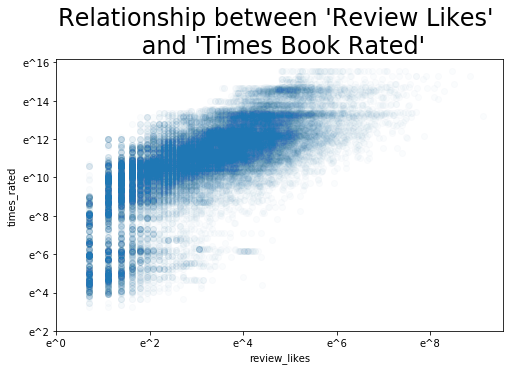

In [327]:
exp =  np.arange(2,18,2)
ylabels = ['e^'+str(x) for x in exp]
exp =  np.arange(0,12,2)
xlabels = ['e^'+str(x) for x in exp]

r30 =pd.DataFrame({'times_rated': ys, 'review_likes': xs})

plt.subplots(figsize=(8,5))
ax =sns.regplot(r30.review_likes, r30.times_rated, fit_reg=False, 
            scatter_kws={'alpha':0.02})
ax.set(xticks=np.arange(0,10,2), xticklabels=xlabels)
ax.set(yticks=np.arange(2,18,2), yticklabels=ylabels)
ax.set_title("Relationship between 'Review Likes' \n and 'Times Book Rated'", fontsize=24)
plt.savefig("1_top30_df.svg")

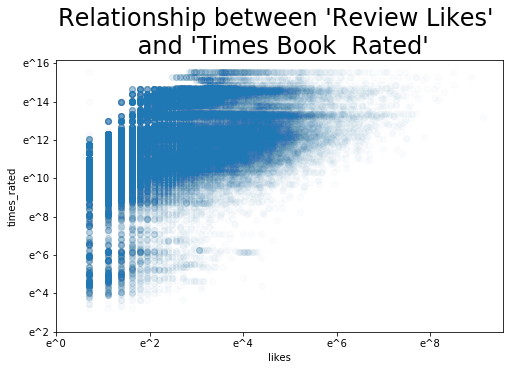

In [328]:
exp =  np.arange(2,18,2)
ylabels = ['e^'+str(x) for x in exp]
exp =  np.arange(0,10,2)
xlabels = ['e^'+str(x) for x in exp]

plt.subplots(figsize=(8,5))
ax =sns.regplot(np.log(df.likes), np.log(df.times_rated), fit_reg=False, 
            scatter_kws={'alpha':0.02})
ax.set(xticks=np.arange(0,10,2), xticklabels=xlabels)
ax.set(yticks=np.arange(2,18,2), yticklabels=ylabels)

ax.set_title("Relationship between 'Review Likes' \n and 'Times Book  Rated'", fontsize=24)
plt.savefig("2_full_df.svg")

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text xticklabel objects>)

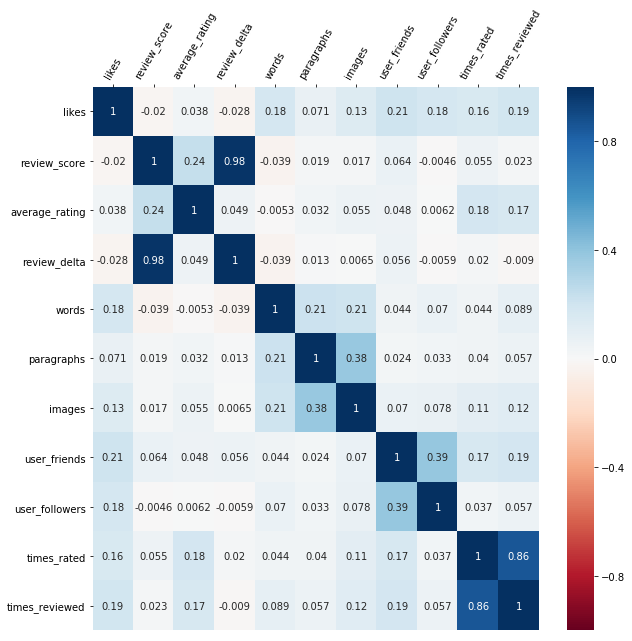

In [217]:
#corr heatmap.

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df2.corr(), cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.xaxis.tick_top()
plt.xticks(rotation=60)

In [131]:
#quick OLS for preliminary check

y = df2.likes.values
X = df2.drop(['likes'], axis=1).values
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     1226.
Date:                Thu, 11 Oct 2018   Prob (F-statistic):               0.00
Time:                        14:28:31   Log-Likelihood:            -3.1845e+05
No. Observations:               53576   AIC:                         6.369e+05
Df Residuals:                   53560   BIC:                         6.371e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.9330      8.950      7.590      0.000      50.391      85.475
x1            -1.8645      0.625     -2.985      0.003      -3.089      -0.640
x2             0.3022      1.250      0.242      0.809      -2.147       2.752
x3            -2.1667      0.676     -3.207      0.001      -3.491      -0.843
x4             0.0367      0.002     16.619      0.000       0.032       0.041
x5            -0.3282      0.214     -1.533      0.125      -0.748       0.091
x6             1.7872      0.379      4.721      0.000       1.045       2.529
x7           2.84e-05      0.001      0.050      0.960      -0.001       0.001
x8             0.0013   6.65e-05     19.125      0.000       0.001       0.001
x9         -8.847e-06   1.07e-06     -8.268      0.000   -1.09e-05   -6.75e-06
x10            0.0006   3.94e-05     15.149      0.000       0.001       0.001
x11           39.6996      0.385    102.983      0.000      38.944      40.455
x12          -12.0757      0.760    -15.887      0.000     -13.566     -10.586
x13            7.1843      0.759      9.466      0.000       5.697       8.672
x14          -17.8733      0.951    -18.799      0.000     -19.737     -16.010
x15            0.1316      0.232      0.568      0.570      -0.323       0.586
x16           -2.3821      0.234    -10.197      0.000      -2.840      -1.924
==============================================================================
Omnibus:                   152437.610   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      15498643009.073
Skew:                          37.800   Prob(JB):                         0.00
Kurtosis:                    2636.835   Cond. No.                     2.47e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.25e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

MSE: 5885.983


Text(0.5,1,'Simple Linear Regression Residuals')

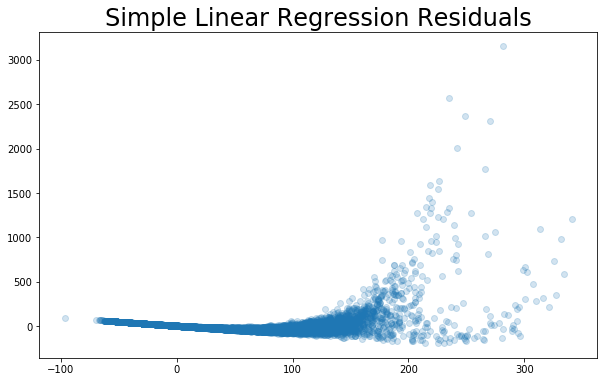

In [132]:
#this is real bad. What's going on?
predict=fit.predict(X_test)
resid=y_test-predict

MSE = np.mean(resid**2)
print('MSE: %.3f' % MSE)

fig = plt.figure(figsize=(10,6))
plt.scatter(x=predict,y=resid,alpha=0.2)
plt.title('Simple Linear Regression Residuals', fontsize=24)

In [28]:
df2.columns

Index(['likes', 'review_score', 'average_rating', 'review_delta', 'words',
       'paragraphs', 'images', 'user_friends', 'user_followers', 'times_rated',
       'times_reviewed'],
      dtype='object')

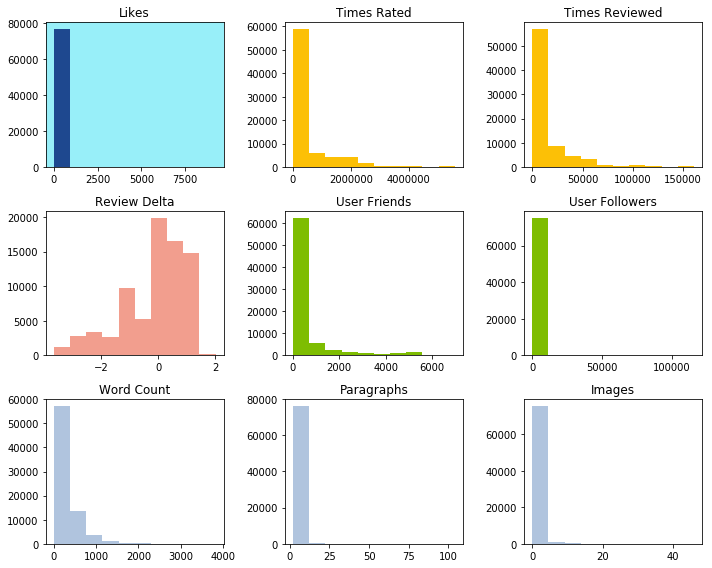

In [329]:
fig, axes = plt.subplots(3,3, figsize=(10,8))

axes[0, 0].hist(df2.likes, color='#1e488f')
axes[0, 0].set_title("Likes")
axes[0, 0].set_facecolor('#98eff9')

axes[0, 1].hist(df2.times_rated, color='#fcc006')
axes[0, 1].set_title("Times Rated")

axes[0, 2].hist(df2.times_reviewed, color='#fcc006')
axes[0, 2].set_title("Times Reviewed")

axes[1, 0].hist(df2.review_delta, color='#f29e8e')
axes[1, 0].set_title("Review Delta")

axes[1, 1].hist(df2.user_friends, color='#7ebd01')
axes[1, 1].set_title("User Friends")

axes[1, 2].hist(df2.user_followers, color='#7ebd01')
axes[1, 2].set_title("User Followers")

axes[2, 0].hist(df2.words, color='lightsteelblue')
axes[2, 0].set_title("Word Count")

axes[2, 1].hist(df2.paragraphs, color='lightsteelblue')
axes[2, 1].set_title("Paragraphs")

axes[2, 2].hist(df2.images, color='lightsteelblue')
axes[2, 2].set_title("Images")


fig.tight_layout()
plt.savefig("3_skewed_dists.svg")

In [30]:
#using Anderson tests, we reject H0
#hese distributions are not exponential

import scipy

for col in ['likes', 'times_rated', 'times_reviewed', 'words', 'user_friends', 'user_followers']:
    p = scipy.stats.anderson(df2[col].values, dist='expon')[1][3]
    t = scipy.stats.anderson(df2[col].values, dist='expon')[0]
    print(col.ljust(15), ':', p, '<', str(round(t)).ljust(10),': reject H0')

likes           : 1.606 < 14592.0    : reject H0
times_rated     : 1.606 < 20039.0    : reject H0
times_reviewed  : 1.606 < 11932.0    : reject H0
words           : 1.606 < 853.0      : reject H0
user_friends    : 1.606 < inf        : reject H0
user_followers  : 1.606 < inf        : reject H0


In [330]:
#transform values in cols to log(values)
#PowerTransform will be implemented in scikit-learn 0.20.0
#since Conda is still using scikit-learn 0.19.1, I am leary about switching to a dev branch

cols = ['likes', 'words', 'times_rated', 'times_reviewed', 'user_friends', 'user_followers']

df2.user_friends = df2.user_friends.apply(lambda x: x+1)
df2.user_followers = df2.user_followers.apply(lambda x: x+1)

for col in cols:
    newcol = 'log_'+col
    df2[newcol]=np.log(df2[col])
    
reindex = list(df2.columns)
reindex.remove('log_likes')
reindex.insert(0, 'log_likes')
print(reindex)

df3 =df2[reindex].copy()
df3.drop(cols, axis=1, inplace=True)
df3.head()

/home/michael/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value
/home/michael/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


['log_likes', 'likes', 'review_score', 'average_rating', 'review_delta', 'words', 'paragraphs', 'images', 'user_friends', 'user_followers', 'times_rated', 'times_reviewed', 'log_words', 'log_times_rated', 'log_times_reviewed', 'log_user_friends', 'log_user_followers']


,log_likes,review_score,average_rating,review_delta,paragraphs,images,log_words,log_times_rated,log_times_reviewed,log_user_friends,log_user_followers
0,5.135798,5,3.95,1.05,3,0,7.131699,10.814102,7.780303,5.902633,7.428927
1,4.007333,5,3.95,1.05,3,0,5.631212,10.814102,7.780303,0.000000,0.000000
2,3.912023,5,3.95,1.05,3,0,4.595120,10.814102,7.780303,7.966587,0.000000
3,3.784190,5,3.95,1.05,3,0,6.228511,10.814102,7.780303,0.000000,0.000000
4,3.583519,4,3.95,0.05,3,0,6.781058,10.814102,7.780303,4.499810,2.484907


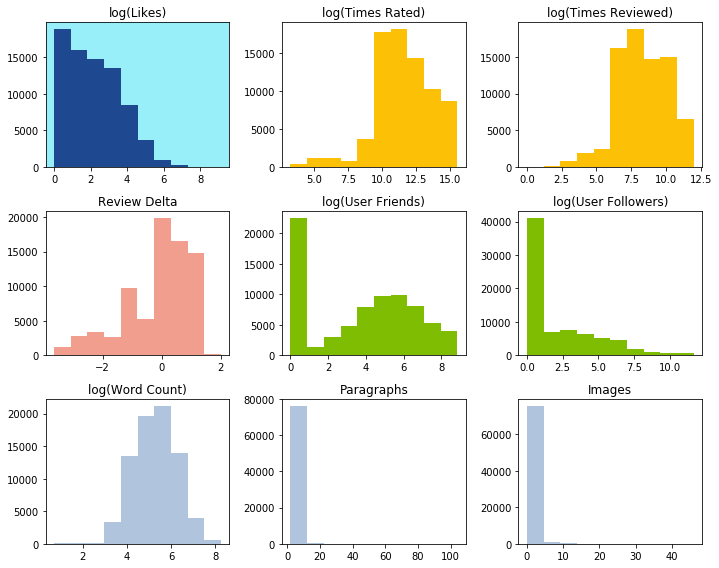

In [294]:
fig, axes = plt.subplots(3,3, figsize=(10,8))

axes[0, 0].hist(df3.log_likes, color='#1e488f')
axes[0, 0].set_title("log(Likes)")
axes[0, 0].set_facecolor('#98eff9')

axes[0, 1].hist(df3.log_times_rated, color='#fcc006')
axes[0, 1].set_title("log(Times Rated)")

axes[0, 2].hist(df3.log_times_reviewed, color='#fcc006')
axes[0, 2].set_title("log(Times Reviewed)")

axes[1, 0].hist(df3.review_delta, color='#f29e8e')
axes[1, 0].set_title("Review Delta")

axes[1, 1].hist(df3.log_user_friends, color='#7ebd01')
axes[1, 1].set_title("log(User Friends)")

axes[1, 2].hist(df3.log_user_followers, color='#7ebd01')
axes[1, 2].set_title("log(User Followers)")

axes[2, 0].hist(df3.log_words, color='lightsteelblue')
axes[2, 0].set_title("log(Word Count)")

axes[2, 1].hist(df3.paragraphs, color='lightsteelblue')
axes[2, 1].set_title("Paragraphs")

axes[2, 2].hist(df3.images, color='lightsteelblue')
axes[2, 2].set_title("Images")


fig.tight_layout()
plt.savefig("4_log_scaled_dists.svg")

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text xticklabel objects>)

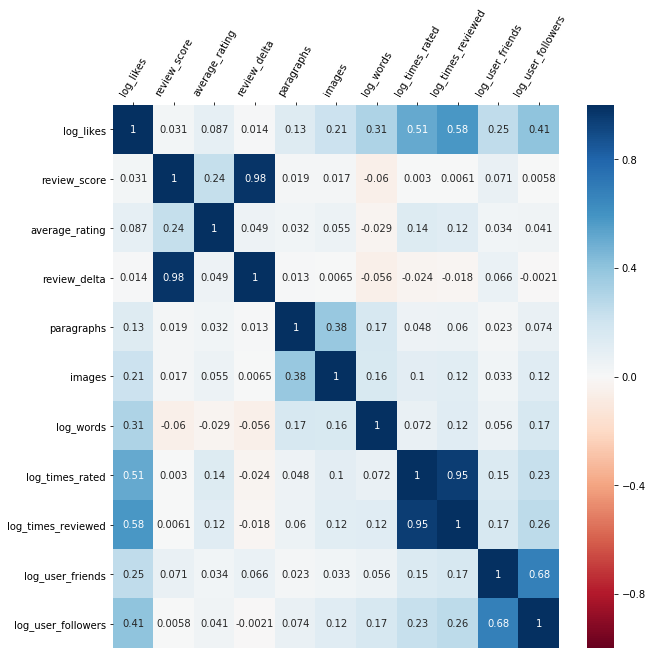

In [32]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df3.corr(), cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.xaxis.tick_top()
plt.xticks(rotation=60)

In [130]:
y = df3.log_likes
X = df3.drop(['log_likes'], axis=1)
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_likes   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     5216.
Date:                Thu, 11 Oct 2018   Prob (F-statistic):               0.00
Time:                        14:28:16   Log-Likelihood:                -80428.
No. Observations:               53576   AIC:                         1.609e+05
Df Residuals:                   53566   BIC:                         1.610e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.1722      0.094    -33.603      0.000      -3.357      -2.987
review_score           0.0660      0.007      9.053      0.000       0.052       0.080
average_rating         0.0919      0.015      6.302      0.000       0.063       0.120
review_delta          -0.0258      0.008     -3.280      0.001      -0.041      -0.010
paragraphs             0.0085      0.002      3.425      0.001       0.004       0.013
images                 0.1169      0.005     25.781      0.000       0.108       0.126
log_words              0.2865      0.005     56.009      0.000       0.276       0.297
log_times_rated       -0.2278      0.008    -29.893      0.000      -0.243      -0.213
log_times_reviewed     0.6612      0.009     74.255      0.000       0.644       0.679
log_user_friends      -0.0016      0.002     -0.685      0.493      -0.006       0.003
log_user_followers     0.1287      0.002     51.598      0.000       0.124       0.134
==============================================================================
Omnibus:                     3285.881   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3929.700
Skew:                           0.640   Prob(JB):                         0.00
Kurtosis:                       3.353   Cond. No.                     1.03e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.5e-25. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

MSE: 79.016


Text(0.5,1,'Log-Transformed Linear Regression Residuals')

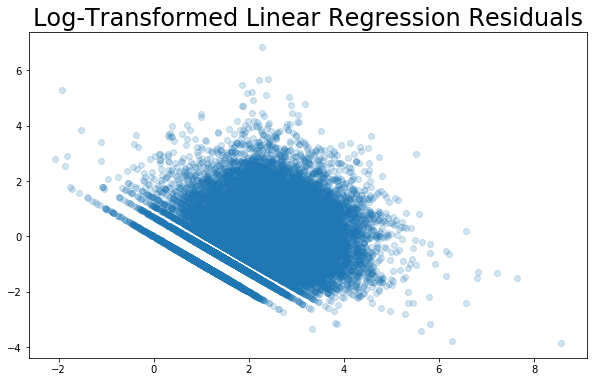

In [34]:
#this is much better!
predict=fit.predict(X_test)
resid=y_test-predict

MSE = np.mean(np.exp(resid)**2)
print('MSE: %.3f' % MSE)

fig = plt.figure(figsize=(10,6))
plt.scatter(x=predict,y=resid,alpha=0.2)
plt.title('Log-Transformed Linear Regression Residuals', fontsize=24)

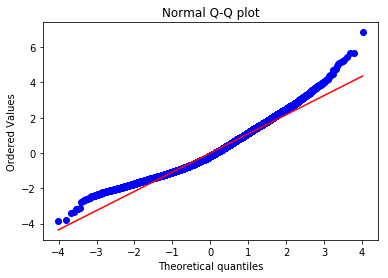

In [36]:
stats.probplot(resid, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [37]:
df3.columns

Index(['log_likes', 'review_score', 'average_rating', 'review_delta',
       'paragraphs', 'images', 'log_words', 'log_times_rated',
       'log_times_reviewed', 'log_user_friends', 'log_user_followers'],
      dtype='object')

In [333]:
# I'm concerned about collinearity between log_times_review & log_times_rated, 
# and review_delta & review_score. Dropping the less interesting ones.
# we can also drop paragraphs and user_friends

df4 = df3.drop(['review_score', 'log_times_rated', 'log_user_friends', 'paragraphs'], axis=1)

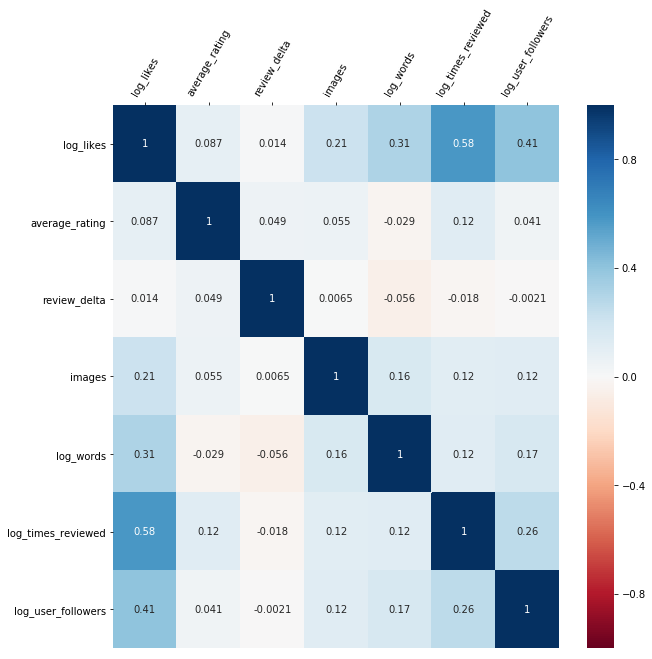

In [331]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df4.corr(), cmap="RdBu", vmin=-1, vmax=1, annot=True)
ax.xaxis.tick_top()
plt.xticks(rotation=60)
plt.savefig("5_corr_matrix.svg")

In [332]:
y = df4.log_likes
X = df4.drop(['log_likes'], axis=1)
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_likes   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                     7640.
Date:                Fri, 12 Oct 2018   Prob (F-statistic):               0.00
Time:                        15:43:22   Log-Likelihood:                -80961.
No. Observations:               53576   AIC:                         1.619e+05
Df Residuals:                   53569   BIC:                         1.620e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.5781      0.094    -38.071      0.000      -3.762      -3.394
average_rating         0.1046      0.022      4.778      0.000       0.062       0.148
review_delta           0.0408      0.004      9.565      0.000       0.032       0.049
images                 0.1198      0.004     28.852      0.000       0.112       0.128
log_words              0.3073      0.005     60.276      0.000       0.297       0.317
log_times_reviewed     0.4087      0.003    144.892      0.000       0.403       0.414
log_user_followers     0.1320      0.002     71.045      0.000       0.128       0.136
==============================================================================
Omnibus:                     3251.085   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3872.492
Skew:                           0.642   Prob(JB):                         0.00
Kurtosis:                       3.291   Cond. No.                         225.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 47.209


Text(0.5,1,'Log-Transformed Linear Regression Residuals')

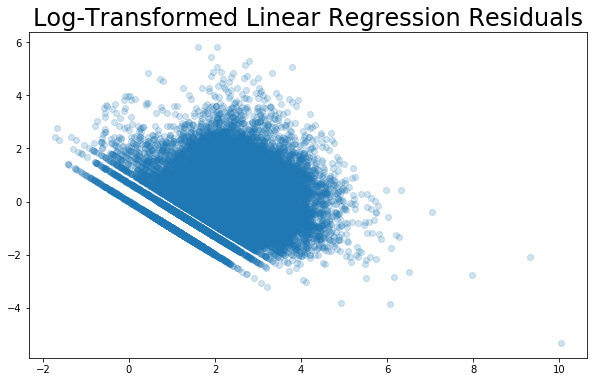

In [334]:
#this is much better!
predict=fit.predict(X_test)
resid=y_test-predict

MSE = np.mean(np.exp(resid)**2)
print('MSE: %.3f' % MSE)

fig = plt.figure(figsize=(10,6))
plt.scatter(x=predict,y=resid,alpha=0.2)
plt.title('Log-Transformed Linear Regression Residuals', fontsize=24)

In [335]:
# tune the lambda parameter by applying k-fold cross validation
Lambda = np.arange(4.3e-5,4.6e-5,1e-7)    
Prediction_error = []   

for l in Lambda:    
    pe = 0.0    #initialize prediction error #loop over the folds
    model = Lasso(l)   
    results = model.fit(X_train,y_train)    #
    pe += sum((model.predict(X_test) - y_test)**2)
    Prediction_error.append(pe)    #append the prediction error
    
#run the lasso:
optimal_lambda_indx = np.argmin(Prediction_error)
optimal_lambda = Lambda[optimal_lambda_indx]


model = Lasso(optimal_lambda)    #generate a model object
results = model.fit(X,y)

In [336]:
#Ran Lasso until the Lambda got so small sklearn started throwing covergence errors.

#tune the lambda parameter by applying k-fold cross validation
Lambda = np.logspace(-25, -10, base=10)    #a list of lambdas
Prediction_error = []    #an empty list to hold the prediction error

kfold = KFold(n_splits=5, random_state= 1).split(X, y)
for l in Lambda:    
    for k, (train, test) in enumerate(kfold):
        pe = 0.0
        model = Lasso(l)   
        results = model.fit(X_train,y_train)    #
        pe += sum((model.predict(X_test) - y_test)**2)
        Prediction_error.append(pe)    #append the prediction error
        print ('Fold: %2d, PE: %.3f' %(k+1, pe))

#run the lasso:
optimal_lambda_indx = np.argmin(Prediction_error)
optimal_lambda = Lambda[optimal_lambda_indx]


model = Lasso(optimal_lambda)    #generate a model object
results = model.fit(X_train,y_train)

/home/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Fold:  1, PE: 27908.281


/home/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Fold:  2, PE: 27908.281


/home/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Fold:  3, PE: 27908.281


/home/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Fold:  4, PE: 27908.281


/home/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Fold:  5, PE: 27908.281


/home/michael/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [337]:
print(optimal_lambda)

print(model.coef_)
MSE =  np.exp(mean_squared_error(y_test, model.predict(X_test)))

print(MSE)

1e-25
[0.         0.10463617 0.04076763 0.11976718 0.30731714 0.40865618
 0.13200632]
3.3716815700939113


In [338]:
print(np.where(abs(model.coef_) > 1.0e-12)[0])
print(df4.columns)

[1 2 3 4 5 6]
Index(['log_likes', 'average_rating', 'review_delta', 'images', 'log_words',
       'log_times_reviewed', 'log_user_followers'],
      dtype='object')


In [339]:
#Lasso doesn't improve the model, let's try Ridge

Lambda = np.logspace(0,10)    #a list of lambdas
Prediction_error = []    #an empty list to hold the prediction error

kfold = KFold(n_splits=5, random_state= 1).split(X, y)
for l in Lambda:    
    for k, (train, test) in enumerate(kfold):
        pe = 0.0
        model = Ridge(l)   
        results = model.fit(X_train,y_train)    #
        pe += sum((model.predict(X_test) - y_test)**2)
        Prediction_error.append(pe)    #append the prediction error
        print ('Fold: %2d, PE: %.3f' %(k+1, pe))

#run the lasso:
optimal_lambda_indx = np.argmin(Prediction_error)
optimal_lambda = Lambda[optimal_lambda_indx]


model = Lasso(optimal_lambda)    #generate a model object
results = model.fit(X_train,y_train)

Fold:  1, PE: 27908.283
Fold:  2, PE: 27908.283
Fold:  3, PE: 27908.283
Fold:  4, PE: 27908.283
Fold:  5, PE: 27908.283


In [340]:
#Ridge discards columns, but also increases MSE

print(optimal_lambda)

print(model.coef_)
MSE =  np.mean(np.exp(y_test, model.predict(X_test))**2)

print(MSE)

1.0
[0.         0.         0.         0.         0.         0.1473551
 0.06290019]
12054.588755334904


In [77]:
#polynomial features. 4 is optimal

for i in range(1,7):
    model = make_pipeline(PolynomialFeatures(i), LinearRegression(fit_intercept=True))
    results = model.fit(X_train, y_train)
    print('%d degree poly. R^2 score: %.5f' % (i, model.score(X_test, y_test)))
    print('%d mean square error     : %.5f' % (i, mean_squared_error(model.predict(X_test), y_test)))
    print('')

1 degree poly. R^2 score: 0.46206
1 mean square error     : 1.20394

2 degree poly. R^2 score: 0.51935
2 mean square error     : 1.07573

3 degree poly. R^2 score: 0.54798
3 mean square error     : 1.01165

4 degree poly. R^2 score: 0.55662
4 mean square error     : 0.99230

5 degree poly. R^2 score: 0.52052
5 mean square error     : 1.07311

6 degree poly. R^2 score: -0.79215
6 mean square error     : 4.01095



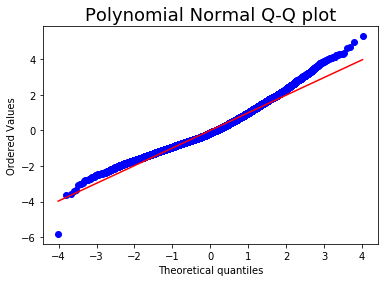

R^2: 0.549248179346939
MSE: 20.803192689575067


In [209]:
#create a pipeline to test Polynomial Features
#slight improvement with p=4, but results are unstable

y = df4.log_likes
X = df4.drop(['log_likes'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

pipeline = Pipeline([('poly', PolynomialFeatures(4)), ('lr', LinearRegression(fit_intercept=True))])

pipeline.fit(X_train, y_train)

resid = y_test-pipeline.predict(X_test)
stats.probplot(resid, dist="norm", plot=plt)
plt.title("Polynomial Normal Q-Q plot", size=18)
plt.show()
print('R^2:', pipeline.score(X_test, y_test))
mse = np.mean(np.exp(resid)**2)
print('MSE:',np.mean(mse))

In [204]:
#we do ElasticNetCV on the polynomial, and find results that are worse across the board
#note that am not sure I picked the best hyperparameters here

L1 = np.arange(0.1,1., 0.1)
for L in L1:
    pipe2 = make_pipeline(StandardScaler(), PolynomialFeatures(4), ElasticNetCV(cv=5, l1_ratio=L, n_alphas=100))
    pipe2.fit(X_train, y_train)
    print('mse  :', mean_squared_error(y_test, np.exp(pipe2.predict(X_test))))
    print('score:', pipe2.score(X_test, y_test))
    print('')

mse  : 4575.534938407383
score: 0.16962097329168668

mse  : 4489.792667603863
score: 0.1765032233139061

mse  : 4447.450289479782
score: 0.18449502406830232

mse  : 4436.287982307944
score: 0.18936059616183154

mse  : 4435.973587258417
score: 0.192634861088309

mse  : 4439.797138198325
score: 0.19498845250587793

mse  : 4444.966042493153
score: 0.19676157944440797

mse  : 4450.561594984941
score: 0.1981452460943591

mse  : 4456.061012766789
score: 0.1992549792324383



In [179]:
#We conclude this is the best model
y = df4.log_likes
X = df4.drop(['log_likes'], axis=1)
X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = sm.OLS(y_train, X_train)
fit = model.fit()
fit.summary()

#sm.add_constant(X_train)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_likes   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     7585.
Date:                Thu, 11 Oct 2018   Prob (F-statistic):               0.00
Time:                        15:30:29   Log-Likelihood:                -81013.
No. Observations:               53576   AIC:                         1.620e+05
Df Residuals:                   53569   BIC:                         1.621e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.5945      0.094    -38.353      0.000      -3.778      -3.411
average_rating         0.1127      0.022      5.156      0.000       0.070       0.156
review_delta           0.0468      0.004     10.955      0.000       0.038       0.055
images                 0.1257      0.004     29.961      0.000       0.117       0.134
log_words              0.3065      0.005     60.166      0.000       0.297       0.317
log_times_reviewed     0.4079      0.003    144.991      0.000       0.402       0.413
log_user_followers     0.1304      0.002     69.778      0.000       0.127       0.134
==============================================================================
Omnibus:                     3370.695   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4043.994
Skew:                           0.652   Prob(JB):                         0.00
Kurtosis:                       3.334   Cond. No.                         224.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

MSE: 31.984


Text(0.5,1,'Log-Transformed Linear Regression Residuals')

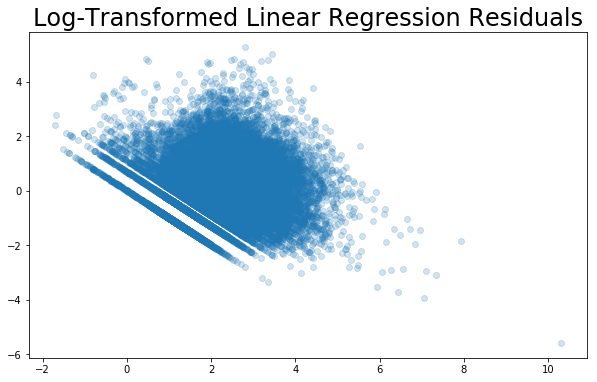

In [180]:
predict=fit.predict(X_test)
resid=y_test-predict

MSE = np.mean(np.exp(resid)**2)
print('MSE: %.3f' % MSE)

fig = plt.figure(figsize=(10,6))
plt.scatter(x=predict,y=resid,alpha=0.2)
plt.title('Log-Transformed Linear Regression Residuals', fontsize=24)

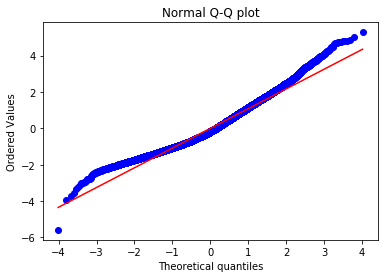

In [181]:
stats.probplot(resid, dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()

In [230]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_likes   R-squared:                       0.459
Model:                            OLS   Adj. R-squared:                  0.459
Method:                 Least Squares   F-statistic:                     7585.
Date:                Fri, 12 Oct 2018   Prob (F-statistic):               0.00
Time:                        12:16:19   Log-Likelihood:                -81013.
No. Observations:               53576   AIC:                         1.620e+05
Df Residuals:                   53569   BIC:                         1.621e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -3.5945      0.094    -38.353      0.000      -3.778      -3.411
average_rating         0.1127      0.022      5.156      0.000       0.070       0.156
review_delta           0.0468      0.004     10.955      0.000       0.038       0.055
images                 0.1257      0.004     29.961      0.000       0.117       0.134
log_words              0.3065      0.005     60.166      0.000       0.297       0.317
log_times_reviewed     0.4079      0.003    144.991      0.000       0.402       0.413
log_user_followers     0.1304      0.002     69.778      0.000       0.127       0.134
==============================================================================
Omnibus:                     3370.695   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4043.994
Skew:                           0.652   Prob(JB):                         0.00
Kurtosis:                       3.334   Cond. No.                         224.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

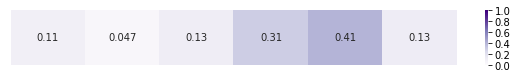

In [343]:
#last few plots for the presentation

coefs = [0.1127, 0.0468, 0.1257, 0.3065, 0.4079, 0.1304]

fig, ax = plt.subplots(figsize=(10,1))
ax = sns.heatmap([coefs], cmap='Purples', vmin=0, vmax=1, annot=True)
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])

plt.savefig("6_corr_row.svg")

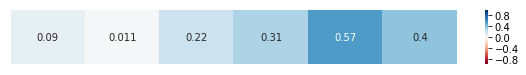

In [344]:
#last few plots for the presentation

fig, ax = plt.subplots(figsize=(10,1))
ax = sns.heatmap([df4.corr()['log_likes'][1:]], cmap="RdBu", vmin=-1, vmax=1, annot=True,
                xticklabels=list(df4.columns[1:]))
ax.xaxis.tick_top()
plt.xticks(rotation=60,)
ax.axes.get_xaxis().set_ticks([])
ax.axes.get_yaxis().set_ticks([])


plt.savefig("7_corr_row.svg")